# 指数関数と対数関数

この２つの関数の学び直しは、セットでまとめて同時に勉強した方が効率が良いでしょう。

同時に、指数関数と対数関数は「底」がありますが、そのうち $10$、$2$、そして$e$の３つが代表的なものなので、それも合わせて学習することにします。

| 底       | 指数関数  | 対数関数       |
|----------|-----------|----------------|
| 10       | $10^x$  | $log_{10}(x)$ または $log(x)$ |
| 2        | $2^x$   | $log_{2}(x)$ |
| ネイピア数 (e) | $e^x$   | $ln(x)$    |


まずは底が２の指数関数と対数関数のグラフを見て、二つの関数のおおまかな特徴を理解します。

以下のコードは３つの関数を表しています。

- 青の曲線：指数関数$f(x)=x^2$
- 赤の曲線：対数関数$g(x)=log_2(x)$
- 緑の直線：$y=x$


指数関数


対数関数


合成関数で確認： f(g(x)) = x
合成関数で確認： g(f(x)) = x


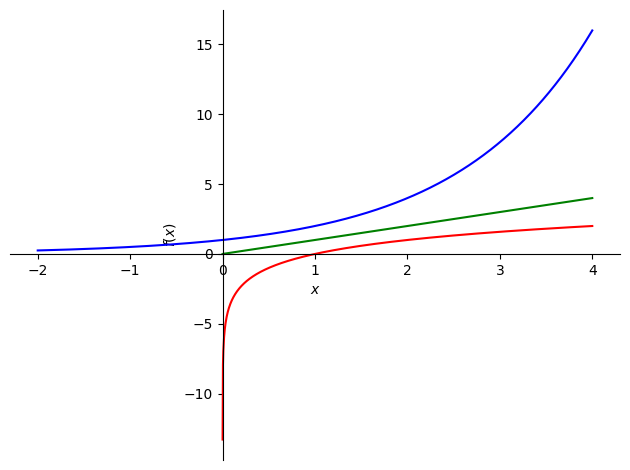

In [3]:
import sympy
from sympy import Symbol, log, simplify
from sympy.plotting import plot

# SymPyの出力をLaTeX形式で表示する設定
sympy.init_printing()

# 数式の表示
from IPython.display import display

# ---- 1) 変数の定義
# log(x) を扱うので x > 0 (正の実数) を想定
x = Symbol('x', real=True, positive=True)

# ---- 2) 関数の定義
f = 2**x        # 指数関数:  2^x
g = log(x, 2)   # 対数関数:  log_base2(x)

# ---- 3) Sympy で数式の確認・変換例

# 3.1) latex 形式で表示
print("指数関数")
display(f)
print("対数関数")
display(g)

# 3.2) 合成関数 f(g(x)) が x に戻るか (x > 0) のシンボリックチェック
#     ただし domain の都合上 x>0 でのみ厳密に成り立つことに注意
fg = f.subs(x, g)      # f(g(x)) = 2^(log_base2(x)) = x
print("合成関数で確認： f(g(x)) =", simplify(fg))

gf = g.subs(x, f)      # g(f(x)) = log_base2(2^x) = x
print("合成関数で確認： g(f(x)) =", simplify(gf))

# ---- 4) グラフの描画
# plot() 関数で複数の関数をまとめて描画する方法はいくつかありますが、
# ここではそれぞれの plot を作成し、あとから結合するアプローチを例示

p1 = plot(f, (x, -2, 4), show=False, label="2^x")
p2 = plot(g, (x, 0.0001, 4), show=False, label="log2(x)")  
# 対数の定義域(>0)を考慮し、 x=0付近を避けて 0.0001 からにする

# 参考として y = x も追加(逆関数の対称性を見る)
h = x  # y = x
p3 = plot(h, (x, 0, 4), show=False, label="y=x")

# plot オブジェクトを結合する
# p1 の上に p2, p3 を重ね描画させる
p1[0].line_color = 'blue'
p2[0].line_color = 'red'
p3[0].line_color = 'green'

p1.append(p2[0])
p1.append(p3[0])

# ラベル名（凡例）を設定してあげるには Sympy 4.x 以降であれば次のように
p1[0].label = "2^x"
p1[1].label = "log2(x)"
p1[2].label = "y = x"
p1.show()


特徴をざっくり言うと：

- 指数関数（青）: $x$が増えると、$y$は最初はゆっくり増えて、次第にすごい勢いでが増える関数
- 対数関数（赤）: $x$が増えると、$y$は最初はすごい勢いで増えて、次第にゆっくり増える関数

ただし、対数関数については$x=1$の時、どんな対数関数で$y=0$になり、そこを基準に考える方が特徴をとらえやすいかもしれない（後述します）。

それぞれのグラフをもっと理解できるように、代表的な点を見てみましょう。

まずは青の指数関数から。

### 指数関数 f(x) = 2^x　のグラフ(青色)上の代表的な数値

|   x   | 2^x     | |
|:-----:|:--------|--|
| -2    | 0.25000 |指数がマイナスの時は逆数の形になる。$1/2^2)$|
| -1    | 0.50000 |指数がマイナスの時は逆数の形になる。$1/2^1)$|
|  0    | 1.00000 |有名な「０乗は１」の点 |
|  1    | 2.00000 |有名な「1乗はそれそのもの」の点 |
|  2    | 4.00000 |2の2乗は4 |
|  3    | 8.00000 |2の3乗は8 |
|  4    | 16.00000 |倍倍になって行く様子が見え始める ｜

指数関数は$x$が正の時、どんどん大きくなるのはよく知られている。負の値の場合、負の方向に行くほどに「どんどん大きくなる数で１を割るので、どんどん変化が小さくなる」という直感を得られる。

### 対数関数 g(x) = log2(x) のグラフ（赤色）上の代表的な数値

まず、対数関数は$x > 0$の時しか考えないのでグラフも原点から見て右側にしかないことが目立つ特徴。また、どんな対数関数も点$(1, 0)$を通るので、そこを起点としてグラフを見ると分かりやすいかもしれません。

|   x    | log2(x) |   |
|:------:|:--------|-----|
|  0.25  | -2.00000|$x$がゼロに近いほどマイナス無限大に近くなるという直感から、点は$y$軸のマイナス方向の大きな値を取る。指数関数のグラフが手掛かりになる。|
|  0.5   | -1.00000|2を何乗すれば0.5になるか。0.5は$0>x>1$の範囲にある。この範囲は$1/n$の形を取る逆数。だから「2をマイナス何乗かする」ことは間違いないのは分かる。上の指数関数の表をみると、0.5になるようにするには$-1$乗すればいいと分かる。 |
|  1     | 0.00000 |2を何乗すれば1になるか。$2^0=1$だから０乗。というかどんな対数関数もこの点は通る |
|  2     | 1.00000 |2を何乗すれば2になるか。$2^1=2$だから１乗。 |
|  4     | 2.00000 |4にするのに2乗するだけで済む。累乗は大きな数になるので少ない数で済む＝＞$y$がどんどん増えなくなるという直感を得られる|

### 合成関数で確認

Pythonコードでは、$f(x)$と$g(x)$が逆関数になっているかどうかを確かめるために、以下をチェックしています。

- 対数関数にｘを渡した結果を、指数関数に渡して得られる結果が元のｘになるかどうか
- 指数関数にｘを渡した結果を、対数関数に渡して得られる結果が元のｘになるかどうか

逆関数は、ダンスの振り付けで例えると「右に２歩動く」と「左に２歩動く」動作の関係のように、それぞれを行うと元の位置に戻ることになります。

合成関数はダンスの振り付けだと「右に２歩動いて、左に２歩動く」というように動作をひとまとめにしたようなものです。
sympyを使って合成関数を作っています。

# xが１の時の特徴

指数関数と関数関数をセットで理解するために、いろんな視点からパターンを見つけると便利です。

まずは$x=1$の時と「底（ここでは２）」の関係を見てみます。

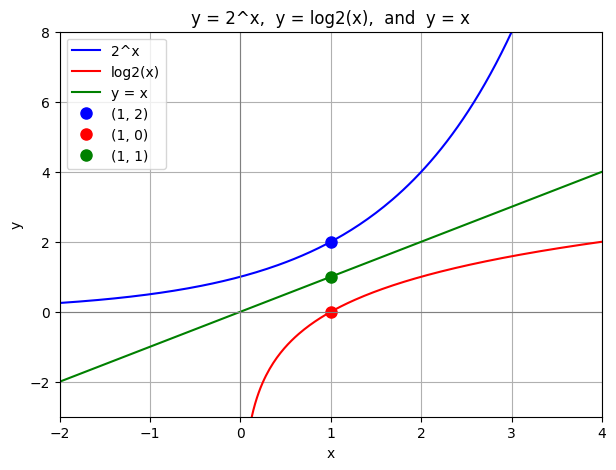

In [17]:
import sympy
import numpy as np
import matplotlib.pyplot as plt

# ================================
# 1) Sympy で関数を定義
# ================================
x = sympy.Symbol('x', real=True, positive=True)

# 指数関数 f(x) = 2^x
f_sym = 2**x
# 対数関数 g(x) = log2(x)
g_sym = sympy.log(x, 2)
# 直線 h(x) = x
h_sym = x

# ================================
# 2) lambdify を使い NumPy 関数化
# ================================
f_np = sympy.lambdify(x, f_sym, "numpy")  # f_np(x) = 2^x
g_np = sympy.lambdify(x, g_sym, "numpy")  # g_np(x) = log2(x)
h_np = sympy.lambdify(x, h_sym, "numpy")  # h_np(x) = x

# ================================
# 3) NumPy で描画用データ作成
# ================================
# (A) 指数関数用の x 範囲: -2 ~ 4
X_f = np.linspace(-2, 4, 200)
Y_f = f_np(X_f)

# (B) 対数関数用の x 範囲: 0.001 ~ 4
X_g = np.linspace(0.001, 4, 200)
Y_g = g_np(X_g)

# (C) 直線 y = x 用の x 範囲: -2 ~ 4
X_h = np.linspace(-2, 4, 200)
Y_h = h_np(X_h)

# ================================
# 4) Matplotlib で描画
# ================================
plt.figure(figsize=(7,5))

# 4.1) 連続曲線を描画
plt.plot(X_f, Y_f, label="2^x", color='blue')
plt.plot(X_g, Y_g, label="log2(x)", color='red')
plt.plot(X_h, Y_h, label="y = x", color='green')

# 4.2) x=1 の点をマーカー付きで表示
x_val = 1
y_f_val = f_np(x_val)  # -> 2
y_g_val = g_np(x_val)  # -> 0
y_h_val = h_np(x_val)  # -> 1

# (1, 2) の青丸
plt.plot([x_val], [y_f_val],
         'bo', markersize=8, label="(1, 2)")
# (1, 0) の赤丸
plt.plot([x_val], [y_g_val],
         'ro', markersize=8, label="(1, 0)")
# (1, 1) の緑丸
plt.plot([x_val], [y_h_val],
         'go', markersize=8, label="(1, 1)")

# 4.3) 軸などをわかりやすく
plt.axhline(0, color='gray', linewidth=0.8)
plt.axvline(0, color='gray', linewidth=0.8)
plt.xlim(-2, 4)
# 対数 g(x) が負方向に下がるため y軸の下限を少しマイナスに
plt.ylim(-3, 8)

plt.xlabel("x")
plt.ylabel("y")
plt.title("y = 2^x,  y = log2(x),  and  y = x")

plt.legend()
plt.grid(True)

# ================================
# 5) グラフを表示
# ================================
plt.show()



上のグラフでは、基準となる$y=x$（緑色）では、当たりまえですが$(1,1)$の点を通ります。

指数関数（青色）では$(1,2)$となり、「（１，底）」でもあります。これは底がどんな数であろうと「（１，底）」になるので指数関数の視覚化の手掛かりになります。（他の底の場合の様子は後述します。）

対数関数（赤色）に関してはもっと単純で$(1,0)$になります。これは底がどんな数でもそうなりますから、対数関数のグラフをイメージする場合の出発点にしてもいいかもしれません。

# 指数関数と対数関数は対称

今度は**同じ底**の指数関数と対数関数が逆関数であることを視覚的に確認します。

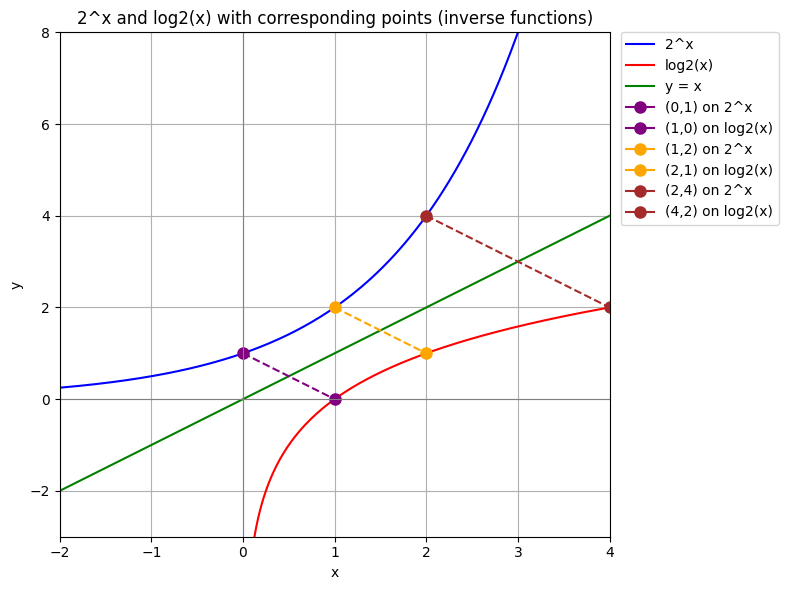

In [4]:
import sympy
import numpy as np
import matplotlib.pyplot as plt

# =================================
# 1) Sympy で関数を定義
# =================================
x = sympy.Symbol('x', real=True, positive=True)

# 指数関数 f(x) = 2^x
f_sym = 2**x
# 対数関数 g(x) = log2(x)
g_sym = sympy.log(x, 2)
# 直線 h(x) = x (逆関数の関係が y=x の対称性として表れる)
h_sym = x

# =================================
# 2) lambdify を使い NumPy 関数化
# =================================
f_np = sympy.lambdify(x, f_sym, "numpy")  # f_np(x) = 2^x
g_np = sympy.lambdify(x, g_sym, "numpy")  # g_np(x) = log2(x)
h_np = sympy.lambdify(x, h_sym, "numpy")  # h_np(x) = x

# =================================
# 3) NumPy で描画用データ作成
# =================================
# (A) 指数関数用の x 範囲: -2 ~ 4
X_f = np.linspace(-2, 4, 200)
Y_f = f_np(X_f)

# (B) 対数関数用の x 範囲: 0.001 ~ 4 (x=0 に近いと log2(x)->-∞)
X_g = np.linspace(0.001, 4, 200)
Y_g = g_np(X_g)

# (C) 直線 y = x 用の x 範囲: -2 ~ 4
X_h = np.linspace(-2, 4, 200)
Y_h = h_np(X_h)

# =================================
# 4) Matplotlib で描画
# =================================
plt.figure(figsize=(8,6))

# 4.1) 連続曲線を描画
plt.plot(X_f, Y_f, label="2^x", color='blue')
plt.plot(X_g, Y_g, label="log2(x)", color='red')
plt.plot(X_h, Y_h, label="y = x", color='green')

# 4.2) 代表的な「対応ペアの点」を示す
#     例: (0,1) <--> (1,0), (1,2) <--> (2,1), (2,4) <--> (4,2)
#     これらは 2^x と log2(x) の関係 (y=x に関して対称) を示す。

pairs_exp = [(0, 1), (1, 2), (2, 4)]  # (x, 2^x)
# 対応する対数側の点は (2^x, x) = (y, x)
# → つまり (1, 0), (2, 1), (4, 2)
pairs_log = [(1, 0), (2, 1), (4, 2)]

# 好みの色を定義(対応ペア同士で同じ色にする)
colors = ["purple", "orange", "brown"]

for (ex, ey), (lx, ly), c in zip(pairs_exp, pairs_log, colors):
    # ex: x座標 (指数グラフ), ey: y座標
    # lx, ly は 対数グラフ上の座標

    # (A) 指数グラフ上の点 (ex, ey)
    plt.plot([ex], [ey], marker='o', markersize=8, color=c,
             label=f"({ex},{ey}) on 2^x")

    # (B) 対数グラフ上の点 (lx, ly)
    plt.plot([lx], [ly], marker='o', markersize=8, color=c,
             label=f"({lx},{ly}) on log2(x)")

    # (C) 両点を結ぶ補助線: dashed線
    #     この直線は y=x に関して対称な点同士をつなぐ
    plt.plot([ex, lx], [ey, ly], linestyle='--', color=c)

# 4.3) 軸などをわかりやすく
plt.axhline(0, color='gray', linewidth=0.8)
plt.axvline(0, color='gray', linewidth=0.8)
plt.xlim(-2, 4)
# 対数 g(x) が負方向に下がるため y軸を少し下げる
plt.ylim(-3, 8)

plt.xlabel("x")
plt.ylabel("y")
plt.title("2^x and log2(x) with corresponding points (inverse functions)")

plt.legend(loc="upper left", bbox_to_anchor=(1.02, 1), borderaxespad=0)
plt.grid(True)

# 5) グラフを表示
plt.tight_layout()
plt.show()


上のグラフでは、三つの代表的な点のペアを破線で示しています。それらのペアは「逆点」、つまりｘとｙの値を入れ替えた座標になっていることが分かります。

| No. | 指数関数 \(2^x\) | 対数関数 \(\log_2(x)\) |
|:---:|:----------------:|:----------------------:|
|  1  | (0, 1)          | (1, 0)                |
|  2  | (1, 2)          | (2, 1)                |
|  3  | (2, 4)          | (4, 2)                |


# 底が2, 10, e、の時の指数関数と対数関数

次に、底が異なる場合に指数関数と対数関数がどのような性質を持つかをグラフにして考えてみましょう。




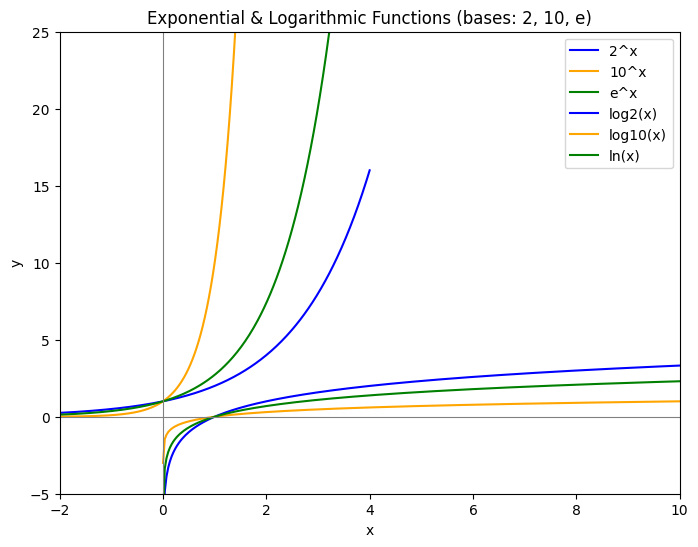

In [10]:
import sympy
import numpy as np
import matplotlib.pyplot as plt

# 1) Sympy でシンボリック変数・関数の定義
x = sympy.Symbol('x', real=True, positive=True)

# 指数関数
f2_sym = 2**x
f10_sym = 10**x
fe_sym = sympy.exp(x)  # e^x

# 対数関数
g2_sym = sympy.log(x, 2)   # log base 2
g10_sym = sympy.log(x, 10) # log base 10
ge_sym = sympy.log(x)      # ln(x)  (底 e)

# 2) lambdify を使って NumPy 関数に変換
f2_np = sympy.lambdify(x, f2_sym, "numpy")   # 2^x
f10_np = sympy.lambdify(x, f10_sym, "numpy") # 10^x
fe_np = sympy.lambdify(x, fe_sym, "numpy")   # e^x

g2_np = sympy.lambdify(x, g2_sym, "numpy")   # log2(x)
g10_np = sympy.lambdify(x, g10_sym, "numpy") # log10(x)
ge_np = sympy.lambdify(x, ge_sym, "numpy")   # ln(x)

# 3) 描画用データを作成
# (A) 指数関数側 (x の範囲: -2 ~ 2)
X_exp = np.linspace(-2, 4, 300)
Y_2   = f2_np(X_exp)   # 2^x
Y_10  = f10_np(X_exp)  # 10^x
Y_e   = fe_np(X_exp)   # e^x

# (B) 対数関数側 (x の範囲: 0.001 ~ 10)  (log(0) は定義されないので 0 に近い値は避ける)
X_log = np.linspace(0.001, 10, 300)
Y_log2  = g2_np(X_log)   # log2(x)
Y_log10 = g10_np(X_log)  # log10(x)
Y_lne   = ge_np(X_log)   # ln(x)

# 4) Matplotlib で描画
plt.figure(figsize=(8,6))

# 4.1) 指数関数3種をプロット
plt.plot(X_exp, Y_2,   label="2^x",   color='blue')
plt.plot(X_exp, Y_10,  label="10^x",  color='orange')
plt.plot(X_exp, Y_e,   label="e^x",   color='green')

# 4.2) 対数関数3種をプロット
plt.plot(X_log, Y_log2,  label="log2(x)",   color='blue')
plt.plot(X_log, Y_log10, label="log10(x)",  color='orange')
plt.plot(X_log, Y_lne,   label="ln(x)",     color='green')

# x=0, y=0 のラインを目安表示 (必須ではありません)
plt.axhline(0, color='gray', linewidth=0.8)
plt.axvline(0, color='gray', linewidth=0.8)

# 5) 軸や凡例の設定
plt.xlabel("x")
plt.ylabel("y")
plt.title("Exponential & Logarithmic Functions (bases: 2, 10, e)")
plt.xlim(-2, 10)  # 対数関数を描くために、最大を10に合わせてみる
plt.ylim(-5, 25)  # 必要に応じて調整
plt.legend()


まずは以下の特徴に気づきます。

- 全ての指数関数が点$(0, 1)$を通ること
- 全ての対数関数が点$(1, 0)$を通ること

このことから、指数関数と対数関数は逆関数であることを思い出すヒントとして、この２つの点をそれぞれのグラフに置いて、そこから考えられるようになります。

次に底の値が大きい場合と小さい場合の違いについて考えると、グラフで底の値が一番大きい１０の場合、指数関数と対数関数の両方とも「極端な変化」になっていることに気づきます。これは指数関数で考えると当たり前で、大きい数を累乗する方が小さい数を累乗する方がすぐに大きな数になることはすぐに分かります。逆に対数関数ではあっという間に「平に」なってしまうのは、底が大きいので大した数で累乗しなくても大きな数を得られる、という風に考えることもできます。

